# <center> Getting Started With The FARS Dataset </center>

# The Accident Table

This table contains general data for each fatal accident.  This data contains a unique identifier, 'ID' and things like geographical location, time, and weather.

### The Person Table

This table contains data about the people involved in the accident.  This includes demographic data and time of death.  The 'ID' columns matches people to accidents.

### The Vehicle Table

Information about the vehicles involved in the accident, such as the make, model, and year of the vehicle.  The 'ID' column matches vehicles to accidents.

In [12]:
# Import libraries and data.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

acc_df = pd.read_csv('./train/accident_train.csv')
test_df = pd.read_csv('./test/accident_test.csv')
per_df = pd.read_csv('./train/person_train.csv')
veh_df = pd.read_csv('./train/vehicle_train.csv')

acc_df.fillna(-1, inplace=True)
per_df.fillna(-1, inplace=True)
veh_df.fillna(-1, inplace=True)

0     00000000000
1     00000000000
2     00000000000
3     00000000000
4     00000000000
5     00000000000
6     00000000000
7     00000000000
8     00000000000
9     00000000000
10    00000000000
11       57222454
12    00000000000
13    00000000000
14    00000000000
...
432495      571371913
432496    00000000000
432497    00000000000
432498    00000000000
432499    00000000000
432500    00000000000
432501    00000000000
432502    00000000000
432503    00000000000
432504    00000000000
432505    00000000000
432506    00000000000
432507    00000000000
432508    00000000000
432509    00000000000
Name: MCARR_ID, Length: 432510, dtype: object

In [2]:
per_df['ID'].size

732461

In [3]:
acc_per_df = pd.merge(acc_df, per_df, on='ID')

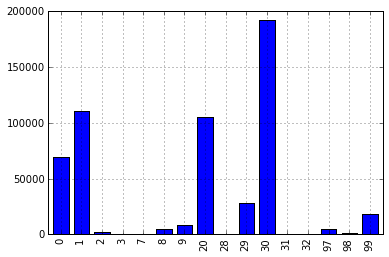

In [13]:
acc_per_df[acc_per_df.DRUNK_DR == False]['AIR_BAG'].value_counts().sort_index().plot(kind='bar')
# acc_per_df[acc_per_df.DRUNK_DR == True]['AIR_BAG'].value_counts().sort_index().plot(kind='bar')
# some strange 97, 98 (they meant 99?)

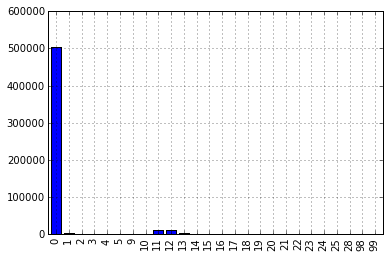

In [8]:
# Location (of pedestrian)
acc_per_df[acc_per_df.DRUNK_DR == False]['LOCATION'].value_counts().sort_index().plot(kind='bar')
# acc_per_df[acc_per_df.DRUNK_DR == True]['LOCATION'].value_counts().sort_index().plot(kind='bar')
# Drunk driving -> slightly more likely for 0 than 11/12

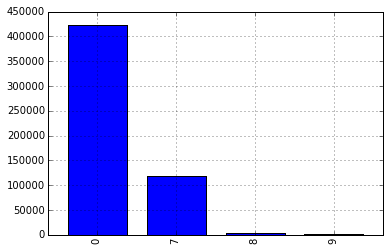

In [46]:
acc_per_df[acc_per_df.DRUNK_DR == False]['DOA'].value_counts().sort_index().plot(kind='bar')
# Drunk driving -> more likely to have 7 (died at scene)

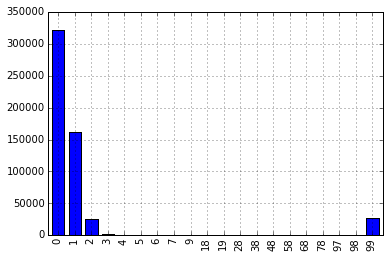

In [43]:
acc_per_df[acc_per_df.DRUNK_DR == False]['RACE'].value_counts().sort_index().plot(kind='bar')
# Drunk driving -> more likely to have 1 recorded

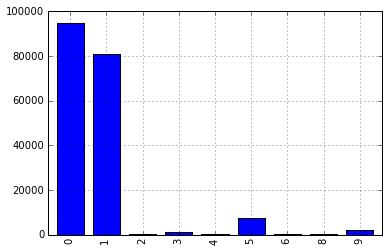

In [39]:
acc_per_df[acc_per_df.DRUNK_DR == True]['HOSPITAL'].value_counts().sort_index().plot(kind='bar')
# acc_per_df[acc_per_df.DRUNK_DR == False]['HOSPITAL'].value_counts().sort_index().plot(kind='bar')
# Drunk driving -> more likely to not involve hospital
# and, why are there responses in 2-8 range?? only 9 is unk

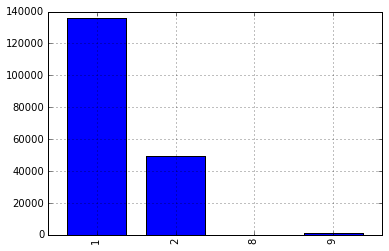

In [28]:
acc_per_df[acc_per_df.DRUNK_DR == True]['SEX'].value_counts().sort_index().plot(kind='bar')
# as expected, males more likely to be involved

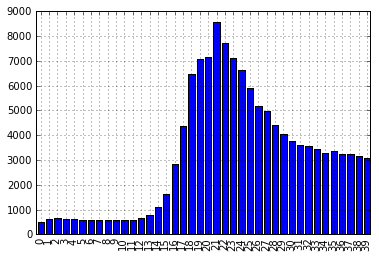

In [13]:
# experiments with age

acc_per_df[acc_per_df.DRUNK_DR == True]['AGE'].value_counts().sort_index().plot(kind='bar', xlim=[0,40])
# peak at ~driving age, vs ~drinking age
# also note the 999's, which should just be 99's

# labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
# acc_per_df['AGE_GROUP'] = pd.cut(acc_per_df.AGE, range(0, 101, 10), right=False, labels=labels)
# acc_per_df[acc_per_df.DRUNK_DR == False]['AGE_GROUP'].value_counts().sort_index().plot(kind='bar')

'\nacc_per_df[acc_per_df.REST_USE == 96].info()\nEven though 96 is not defined, there are 5480 such entries\n'

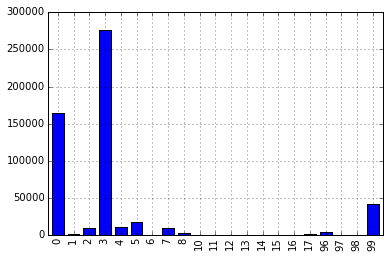

In [16]:
# experiments with seat belt/other restraint usage

acc_per_df[acc_per_df.DRUNK_DR == False]['REST_USE'].value_counts().sort_index().plot(kind='bar')
# acc_per_df[acc_per_df.REST_USE == 96].info()
"""
acc_per_df[acc_per_df.REST_USE == 96].info()
Even though 96 is not defined, there are 5480 such entries
- DRUNK_DR has proportionally more instances of 0 ~ as expected
"""

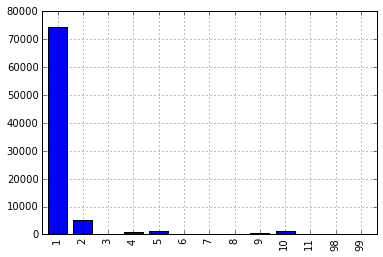

In [19]:
acc_df[(acc_df.DRUNK_DR == True)]['WEATHER'].value_counts().sort_index().plot(kind='bar')

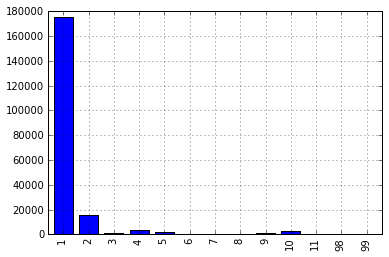

In [20]:
acc_df[(acc_df.DRUNK_DR == False)]['WEATHER'].value_counts().sort_index().plot(kind='bar')

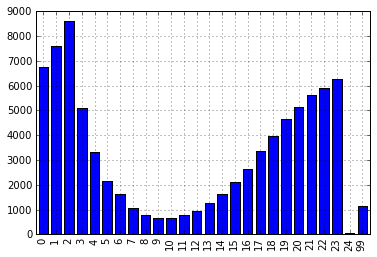

In [11]:
# acc_df.head()
# acc_df['HOUR'].value_counts().sort_index().plot(kind='bar')
acc_df[(acc_df.DRUNK_DR == True)]['HOUR'].value_counts().sort_index().plot(kind='bar')

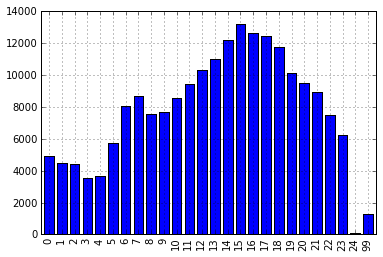

In [12]:
acc_df[(acc_df.DRUNK_DR == False)]['HOUR'].value_counts().sort_index().plot(kind='bar')
# morning rush peak at 7, evening commute at 3/4, then dies down

In [8]:
# Let's explore the data a little bit.
daywk_group = acc_df.groupby('DAY_WEEK')
daywks = list(daywk_group.groups.keys())
fatals = np.zeros(len(daywks))
for i, daywk in enumerate(daywks):
    fatals[i] = acc_df.ix[daywk_group.groups[daywk]][(acc_df.DRUNK_DR == True)]['FATALS'].sum()
#     fatals[i] = acc_df.ix[daywk_group.groups[daywk]][(acc_df.DRUNK_DR == False)]['FATALS'].sum()

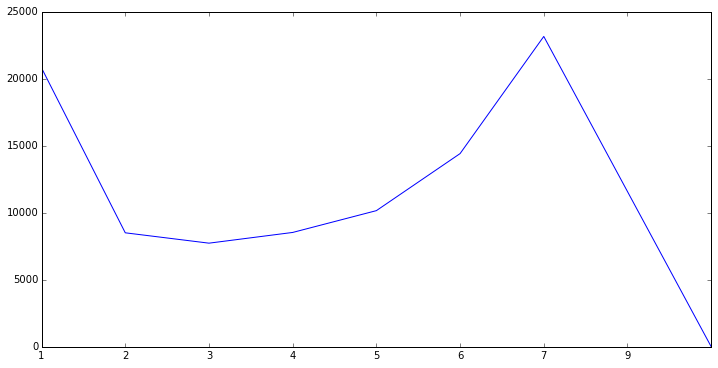

In [9]:
fig = plt.figure()
fig.set_size_inches(12,6)

ax = fig.add_subplot(111)
ax.plot(daywks, fatals)
labels = ax.set_xticklabels([str(daywk) for daywk in daywks])
# no DDR- roughly uniform, slight uptick towards fri/sat (weekend effect)
# DDR - large increase towards weekend, and sharp drop to mon

In [30]:
acc_veh_df = pd.merge(acc_df, veh_df, on='ID')

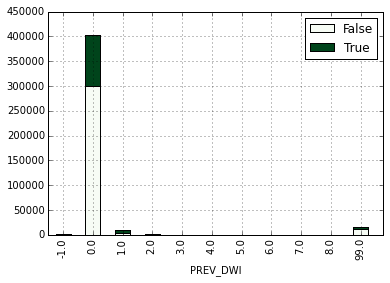

In [59]:
# PREV_DWI
from matplotlib import cm
# regular vis way
# acc_veh_df[acc_veh_df.DRUNK_DR == False]['PREV_DWI'].value_counts().sort_index().plot(kind='bar')
# acc_veh_df[acc_veh_df.DRUNK_DR == True]['PREV_DWI'].value_counts().sort_index().plot(kind='bar')
# Drunk driving -> slightly more likely for 1,2

# stacked vis
test0 = acc_veh_df.groupby(['PREV_DWI', 'DRUNK_DR'])['PREV_DWI'].count().unstack('DRUNK_DR')
ax0 = test0.plot(kind='bar', stacked=True, colormap='Greens')
ax0.legend(loc='upper right')
# , ylim=[90000, 350000]

# 'apparently dupe ids'
# acc_veh_df[['ID', 'VEH_NO']].head(10)
# -> some IDs look duplicated, but it is due to dif vehicles in same accident

In [ ]:
# speed limit grouping
# ~SP_LIMIT def given, but not in any table - also try getting this from maps?
daywk_group = acc_df.groupby('DAY_WEEK')
daywks = list(daywk_group.groups.keys())
fatals = np.zeros(len(daywks))
for i, daywk in enumerate(daywks):
#     fatals[i] = acc_df.ix[daywk_group.groups[daywk]][(acc_df.DRUNK_DR == True)]['FATALS'].sum()
    fatals[i] = acc_df.ix[daywk_group.groups[daywk]][(acc_df.DRUNK_DR == False)]['FATALS'].sum()

In [28]:
veh_df['SP_LIMIT'].size

KeyError: u'no item named SP_LIMIT'

In [64]:
state_group = acc_df.groupby('STATE')
states = list(state_group.groups.keys())
fatals = np.zeros(len(states))
for i, state in enumerate(states):
    fatals[i] = acc_df.ix[state_group.groups[state]]['FATALS'].sum()
fatals.size

51

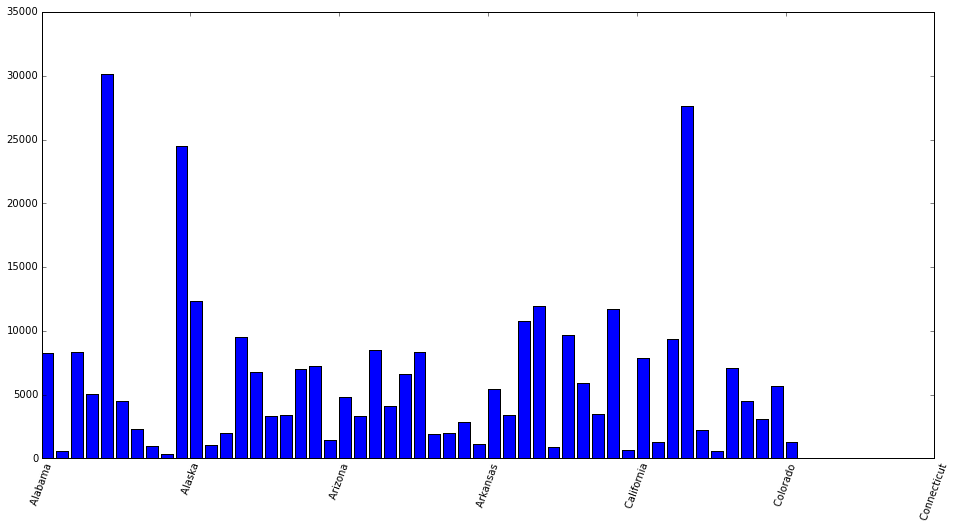

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
width = 0.1

states = ["Alabama ","Alaska ","Arizona ","Arkansas ",
"California ",
"Colorado ",
"Connecticut ", 
"District of Columbia ",
"Delaware ",
"Florida ",
"Georgia ",
"Hawaii ",
"Idaho ",
"Illinois ",
"Indiana ",
"Iowa ",
"Kansas ",
"Kentucky ",
"Louisiana ",
"Maine ",
"Maryland ",
"Massachusetts ",
"Michigan ",
"Minnesota ",
"Mississippi", 
"Missouri ",
"Montana ",
"Nebraska ",
"Nevada ",
"New Hampshire ", 
"New Jersey ",
"New Mexico ",
"New York ",
"North Carolina ","North Dakota ","Ohio ","Oklahoma ",
"Oregon ","Pennsylvania ","Rhode Island ","South Carolina ",
"South Dakota ", "Tennessee ","Texas ","Utah ","Vermont ",
"Virginia ","Washington ","West Virginia ", "Wisconsin ", "Wyoming "]

len(states)
ax.bar(np.arange(len(states)), fatals)
# ticks = ax.set_xticks(np.arange(len(states)), states)
ax.set_xticklabels(states, rotation=70)
# labels = ax.set_xticklabels([str(state) for state in states], rotation=70)

In [57]:
fatals

array([  8302.,    610.,   8315.,   5078.,  30156.,   4467.,   2323.,
         1012.,    326.,  24485.,  12334.,   1043.,   2014.,   9555.,
         6785.,   3339.,   3441.,   7030.,   7271.,   1416.,   4809.,
         3293.,   8538.,   4072.,   6622.,   8366.,   1922.,   1969.,
         2818.,   1096.,   5428.,   3421.,  10805.,  11964.,    899.,
         9667.,   5934.,   3498.,  11747.,    639.,   7855.,   1315.,
         9358.,  27656.,   2246.,    611.,   7124.,   4493.,   3070.,
         5673.,   1292.])